# IMPORTING LIBRARIES #

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

## LOADING DATA ##


In [2]:
#read data file
ames_train= pd.read_csv("./datasets/train.csv")
ames_test= pd.read_csv("./datasets/test.csv")

In [3]:
ames_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,534,531363010,20,RL,80.0,9605,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,159000
1,803,906203120,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,271900
2,956,916176030,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500
3,460,528180130,120,RL,48.0,6472,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,248500
4,487,528290030,80,RL,61.0,9734,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,167000


In [4]:
ames_train.shape

(2197, 82)

In [5]:
ames_test.shape

(733, 81)

<a id="3"></a>
 <h2 style='background:#a9a799; border:0; color:black'><center>DATA PREPROCESSING</center></h2> 
# Data Preprocessing
**Steps involved in Data Preprocessing**
* Data cleaning
* Dropping irrelevant coulumns
* Removing and imputing null values
* Removing outliers
* Data engineering 
* Log transforming dependent variable (SalePrice)

In [6]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2197 non-null   int64  
 1   PID              2197 non-null   int64  
 2   MS SubClass      2197 non-null   int64  
 3   MS Zoning        2197 non-null   object 
 4   Lot Frontage     1835 non-null   float64
 5   Lot Area         2197 non-null   int64  
 6   Street           2197 non-null   object 
 7   Alley            143 non-null    object 
 8   Lot Shape        2197 non-null   object 
 9   Land Contour     2197 non-null   object 
 10  Utilities        2197 non-null   object 
 11  Lot Config       2197 non-null   object 
 12  Land Slope       2197 non-null   object 
 13  Neighborhood     2197 non-null   object 
 14  Condition 1      2197 non-null   object 
 15  Condition 2      2197 non-null   object 
 16  Bldg Type        2197 non-null   object 
 17  House Style   

In [7]:
ames_train.dtypes
ames_train.dtypes.value_counts()

object     43
int64      28
float64    11
dtype: int64

**change data type of Order from int64 to object**
**ames_train['Order'] = ames_train['Order'].astype('object')**

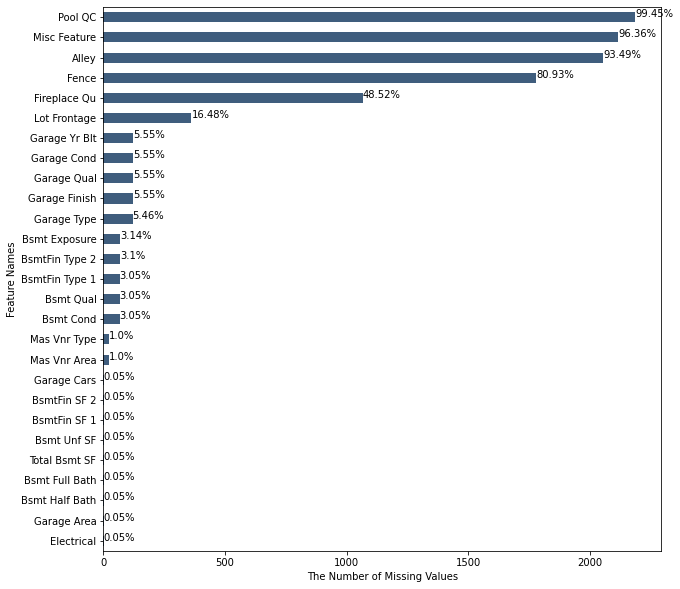

In [8]:
#Checking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");


for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names');

In [9]:
# Drop PID as irrelevant coulums
# Drop  'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu' which have too many null values 

ames_train.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

#apply the same method to test data 

ames_test.drop(['PID', 'Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)

ames_train.head().T

,0,1,2,3,4
Order,534,803,956,460,487
MS SubClass,20,20,20,120,80
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,80.0,90.0,NaN,48.0,61.0
Lot Area,9605,14684,14375,6472,9734
...,...,...,...,...,...
Mo Sold,4,6,1,4,5
Yr Sold,2009,2009,2009,2009,2009
Sale Type,WD,WD,COD,WD,WD
Sale Condition,Normal,Normal,Abnorml,Normal,Normal


In [10]:
ames_train['Lot Frontage'].describe()

count    1835.000000
mean       69.549319
std        23.188224
min        21.000000
25%        58.500000
50%        69.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

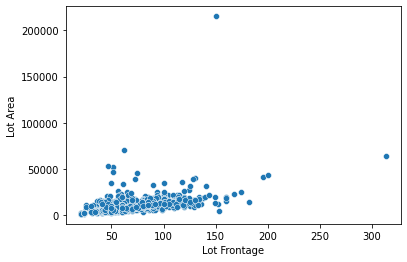

In [11]:
#sns.lmplot(x='Lot Frontage', y='Lot Area', data=ames_train)
sns.scatterplot(x=ames_train['Lot Frontage'], y=ames_train['Lot Area']);

In [12]:
#filtering out outliers
ames_train_impute = ames_train[(ames_train['Lot Frontage'] < 250)].copy()
ames_train_impute = ames_train[(ames_train['Lot Area'] < 100000)].copy()

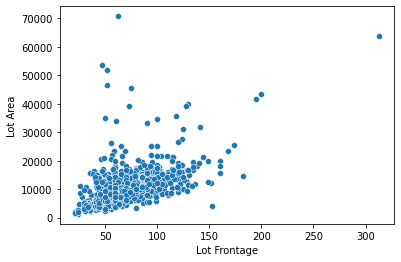

In [13]:
sns.scatterplot(x=ames_train_impute['Lot Frontage'], y=ames_train_impute['Lot Area']);

In [14]:
#there seems to be linear relationship between Lot Frontage and Lot Area
ames_train_impute.dropna(inplace=True)

#calculate OLS to impute missing values 
X = ames_train_impute[['Lot Area']]
y = ames_train_impute['Lot Frontage']
lr = LinearRegression()
lr.fit(X,y)

print(f'Model intercept: {lr.intercept_}')
print(f'Model coefficient: {lr.coef_[0]}')

Model intercept: 44.17950233701229
Model coefficient: 0.0026042282346462314


Lot Frontage = 44.179 + 0.0026*Lot Area

In [15]:
#Imputing missing values of Lot Frontage with linear regression

ames_train['Lot Frontage'] = ames_train.apply(lambda row: round(row['Lot Area']*0.0026 +44.179,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

ames_test['Lot Frontage'] = ames_test.apply(lambda row: round(row['Lot Area']*0.0026 +44.179,1)
                                     if np.isnan(row['Lot Frontage']) else row['Lot Frontage'],axis =1)

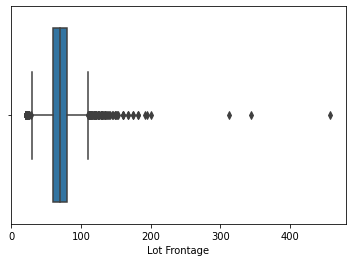

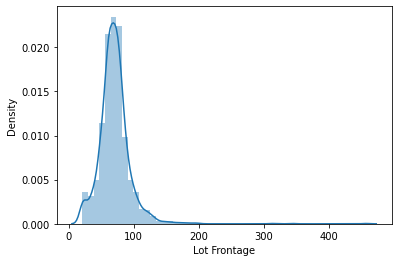

In [16]:
# Box plot
#
sns.boxplot(ames_train['Lot Frontage'])
plt.show()
#
# Distribution plot
#
sns.distplot(ames_train['Lot Frontage'])
plt.show()

In [17]:
#Lot Frontage is right skewed with outliers, dropping the outliers 
ames_train = ames_train[(ames_train['Lot Frontage'] < 300)]
ames_train = ames_train[(ames_train['Lot Area'] < 100000)]

#ames_test = ames_test[(ames_test['Lot Frontage'] < 300)]
#ames_test = ames_test[(ames_test['Lot Area'] < 100000)]


In [18]:
ames_train.shape

(2193, 76)

In [19]:
ames_train['Garage Yr Blt'].value_counts()

2005.0    116
2007.0     95
2006.0     88
2004.0     78
2003.0     75
         ... 
2207.0      1
1943.0      1
1906.0      1
1896.0      1
1929.0      1
Name: Garage Yr Blt, Length: 101, dtype: int64

In [20]:
#Year 2207 is incorrect input, drop this row
ames_train= ames_train[ames_train['Garage Yr Blt'] != 2207]

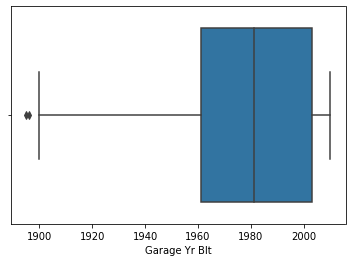

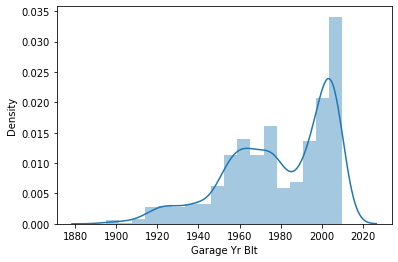

In [21]:
# Box plot
#
sns.boxplot(ames_train['Garage Yr Blt'])
plt.show()
#
# Distribution plot
#
sns.distplot(ames_train['Garage Yr Blt'])
plt.show()

In [22]:
ames_train['Garage Yr Blt'].describe()

count    2070.000000
mean     1978.786473
std        25.277499
min      1895.000000
25%      1961.000000
50%      1981.000000
75%      2003.000000
max      2010.000000
Name: Garage Yr Blt, dtype: float64

In [23]:
ames_train['Garage Cond'].value_counts()

TA    1988
Fa      55
Po      13
Gd      11
Ex       3
Name: Garage Cond, dtype: int64

In [24]:
ames_train['Garage Qual'].value_counts()

TA    1952
Fa      93
Gd      18
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [25]:
ames_train['Garage Type'].value_counts()

Attchd     1313
Detchd      568
BuiltIn     137
Basment      28
2Types       17
CarPort       9
Name: Garage Type, dtype: int64

In [26]:
ames_train['Garage Finish'].value_counts()

Unf    901
RFn    627
Fin    542
Name: Garage Finish, dtype: int64

In [27]:
#Impute missing values of Garage Cond, Garage Qual, Garage Type with their modes. 
ames_train['Garage Cond'].fillna(ames_train['Garage Cond'].mode()[0], inplace=True)
ames_train['Garage Qual'].fillna(ames_train['Garage Qual'].mode()[0], inplace=True)
ames_train['Garage Type'].fillna(ames_train['Garage Type'].mode()[0], inplace=True)
ames_train['Garage Finish'].fillna(ames_train['Garage Finish'].mode()[0], inplace=True)


#test data
ames_test['Garage Cond'].fillna(ames_test['Garage Cond'].mode()[0], inplace=True)
ames_test['Garage Qual'].fillna(ames_test['Garage Qual'].mode()[0], inplace=True)
ames_test['Garage Type'].fillna(ames_test['Garage Type'].mode()[0], inplace=True)
ames_test['Garage Finish'].fillna(ames_test['Garage Finish'].mode()[0], inplace=True)


In [28]:
#Assuming garage is bulilt as the same time as house, thus fill the 'Garage Yr Blt' null values with the same value as 'Year Built' of the house
ames_train['Garage Yr Blt'] = ames_train.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

#test data
ames_test['Garage Yr Blt'] = ames_test.apply(lambda row: row['Year Built'] 
                                     if np.isnan(row['Garage Yr Blt']) else row['Garage Yr Blt'],axis =1)

In [29]:
ames_train['Bsmt Exposure'].value_counts()

No    1406
Av     324
Gd     223
Mn     170
Name: Bsmt Exposure, dtype: int64

In [30]:
ames_train['BsmtFin Type 1'].value_counts()

GLQ    661
Unf    644
ALQ    331
Rec    203
BLQ    179
LwQ    107
Name: BsmtFin Type 1, dtype: int64

In [31]:
ames_train['BsmtFin Type 2'].value_counts()

Unf    1867
Rec      75
LwQ      69
BLQ      52
ALQ      38
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [32]:
ames_train['Bsmt Qual'].value_counts()

TA    929
Gd    926
Ex    197
Fa     71
Po      2
Name: Bsmt Qual, dtype: int64

In [33]:
ames_train['Bsmt Cond'].value_counts()

TA    1965
Gd      83
Fa      72
Po       3
Ex       2
Name: Bsmt Cond, dtype: int64

In [34]:
#Impute missing values of 'Bsmt Cond', 'Bsmt Exposure', ''BsmtFin Type 2' with their modes. 

ames_train['Bsmt Cond'].fillna(ames_train['Bsmt Cond'].mode()[0], inplace=True)
ames_train['Bsmt Exposure'].fillna(ames_train['Bsmt Exposure'].mode()[0], inplace=True)
ames_train['BsmtFin Type 2'].fillna(ames_train['BsmtFin Type 2'].mode()[0], inplace=True)
ames_train['BsmtFin Type 1'].fillna(ames_train['BsmtFin Type 1'].mode()[0], inplace=True)
ames_train['Bsmt Qual'].fillna(ames_train['Bsmt Qual'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['Bsmt Cond'].fillna(ames_test['Bsmt Cond'].mode()[0], inplace=True)
ames_test['Bsmt Exposure'].fillna(ames_test['Bsmt Exposure'].mode()[0], inplace=True)
ames_test['BsmtFin Type 2'].fillna(ames_test['BsmtFin Type 2'].mode()[0], inplace=True)
ames_test['BsmtFin Type 1'].fillna(ames_test['BsmtFin Type 1'].mode()[0], inplace=True)
ames_test['Bsmt Qual'].fillna(ames_test['Bsmt Qual'].mode()[0], inplace=True)

In [35]:
ames_train['Mas Vnr Type'].value_counts()

None       1306
BrkFace     658
Stone       188
BrkCmn       18
CBlock        1
Name: Mas Vnr Type, dtype: int64

In [36]:
ames_train['Mas Vnr Area'].value_counts()

0.0       1302
120.0       12
340.0       10
16.0         9
216.0        9
          ... 
564.0        1
382.0        1
436.0        1
255.0        1
1159.0       1
Name: Mas Vnr Area, Length: 390, dtype: int64

In [37]:
#Impute missing values of 'Mas Vnr Type', 'Mas Vnr Area' with their modes. 

ames_train['Mas Vnr Type'].fillna(ames_train['Mas Vnr Type'].mode()[0], inplace=True)
ames_train['Mas Vnr Area'].fillna(ames_train['Mas Vnr Area'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['Mas Vnr Type'].fillna(ames_test['Mas Vnr Type'].mode()[0], inplace=True)
ames_test['Mas Vnr Area'].fillna(ames_test['Mas Vnr Area'].mode()[0], inplace=True)

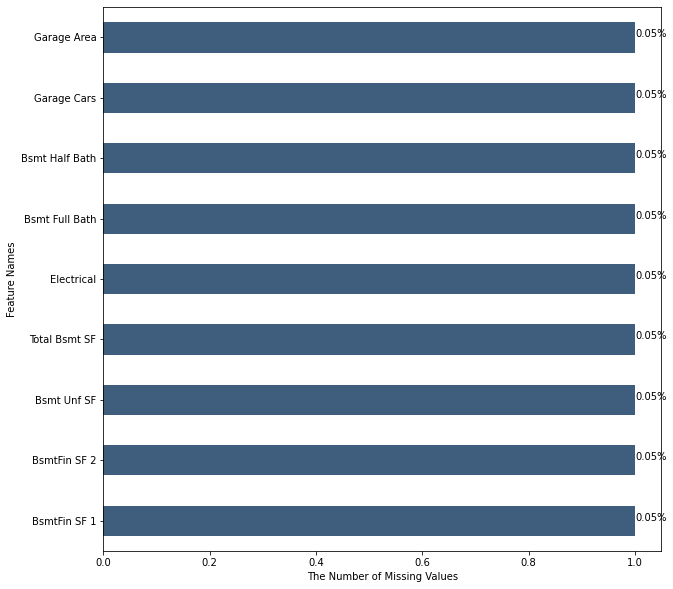

In [38]:
#Rechecking percentage of null values

Nan = ames_train.isnull().sum()[ames_train.isnull().sum()>0]

Nan.sort_values().plot(kind='barh', figsize=(10, 10), color = "#3F5D7D");

for y, x in enumerate(Nan.sort_values()):
    
    plt.annotate(str(round(x/ames_train.shape[0]*100,2))+'%', xy=(x, y), size=10)
    
plt.xlabel('The Number of Missing Values')

plt.ylabel('Feature Names')
plt.show()

In [39]:
#Impute all remaining missing values with their modes. 
ames_train['BsmtFin SF 1'].fillna(ames_train['BsmtFin SF 1'].mode()[0], inplace=True)
ames_train['BsmtFin SF 2'].fillna(ames_train['BsmtFin SF 2'].mode()[0], inplace=True)
ames_train['Bsmt Unf SF'].fillna(ames_train['Bsmt Unf SF'].mode()[0], inplace=True)
ames_train['Total Bsmt SF'].fillna(ames_train['Total Bsmt SF'].mode()[0], inplace=True)
ames_train['Electrical'].fillna(ames_train['Electrical'].mode()[0], inplace=True)
ames_train['Bsmt Full Bath'].fillna(ames_train['Bsmt Full Bath'].mode()[0], inplace=True)
ames_train['Bsmt Half Bath'].fillna(ames_train['Bsmt Half Bath'].mode()[0], inplace=True)
ames_train['Garage Cars'].fillna(ames_train['Garage Cars'].mode()[0], inplace=True)
ames_train['Garage Area'].fillna(ames_train['Garage Area'].mode()[0], inplace=True)

#apply the same method to test data
ames_test['BsmtFin SF 1'].fillna(ames_test['BsmtFin SF 1'].mode()[0], inplace=True)
ames_test['BsmtFin SF 2'].fillna(ames_test['BsmtFin SF 2'].mode()[0], inplace=True)
ames_test['Bsmt Unf SF'].fillna(ames_test['Bsmt Unf SF'].mode()[0], inplace=True)
ames_test['Total Bsmt SF'].fillna(ames_test['Total Bsmt SF'].mode()[0], inplace=True)
ames_test['Electrical'].fillna(ames_test['Electrical'].mode()[0], inplace=True)
ames_test['Bsmt Full Bath'].fillna(ames_test['Bsmt Full Bath'].mode()[0], inplace=True)
ames_test['Bsmt Half Bath'].fillna(ames_test['Bsmt Half Bath'].mode()[0], inplace=True)
ames_test['Garage Cars'].fillna(ames_test['Garage Cars'].mode()[0], inplace=True)
ames_test['Garage Area'].fillna(ames_test['Garage Area'].mode()[0], inplace=True)

In [40]:
ames_train.isnull().sum().sum()

0

In [41]:
ames_test.isnull().sum().sum()

0

In [42]:
ames_train.shape

(2192, 76)

In [43]:
ames_test.shape

(733, 75)

In [44]:
#Change data type
#ames_train['Overall Qual'] = ames_train['Overall Qual'].astype('object')
#ames_train['Garage Cars '] = ames_train['Garage Cars'].astype('object')

#ames_test['Overall Qual'] = ames_test['Overall Qual'].astype('object')
#ames_test['Garage Cars '] = ames_test['Garage Cars'].astype('object')



In [45]:
#Changing year to duration of time of train data (age)
ames_train['Age_Year Built'] = 2011 - ames_train['Year Built']
ames_train['Age_Year Remod/Add'] = 2011 - ames_train['Year Remod/Add'] 
ames_train['Age_Year Sold'] = 2011 - ames_train['Yr Sold'] 
ames_train['Age_Garage Yr Blt'] = 2011 - ames_train['Garage Yr Blt']

#Drop original columns
ames_train.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_train.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,SalePrice,Age_Year Built,Age_Year Remod/Add,Age_Year Sold,Age_Garage Yr Blt
0,534,20,RL,80.0,9605,Pave,Reg,Lvl,AllPub,Corner,...,0,0,4,WD,Normal,159000,4,4,2,4.0
1,803,20,RL,90.0,14684,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,6,WD,Normal,271900,21,20,2,21.0
2,956,20,RL,81.6,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,...,0,0,1,COD,Abnorml,137500,53,53,2,53.0
3,460,120,RL,48.0,6472,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,WD,Normal,248500,3,3,2,3.0
4,487,80,RL,61.0,9734,Pave,IR1,Lvl,AllPub,Inside,...,0,0,5,WD,Normal,167000,7,7,2,7.0


In [46]:
#Changing year to duration of time of test data (age)
ames_test['Age_Year Built'] = 2011 - ames_test['Year Built'] 
ames_test['Age_Year Remod/Add'] = 2011 - ames_test['Year Remod/Add']
ames_test['Age_Year Sold'] = 2011 - ames_test['Yr Sold']
ames_test['Age_Garage Yr Blt'] = 2011 - ames_test['Garage Yr Blt']

#Drop original columns
ames_test.drop(['Year Built', 'Year Remod/Add', 'Yr Sold', 'Garage Yr Blt'], axis=1, inplace=True)
ames_test.head()

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Sale Type,Sale Condition,Age_Year Built,Age_Year Remod/Add,Age_Year Sold,Age_Garage Yr Blt
0,2127,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,8,WD,Normal,17,16,4,17.0
1,193,75,RL,64.4,7793,Pave,IR1,Bnk,AllPub,Corner,...,0,0,0,5,WD,Normal,89,6,1,83.0
2,2407,120,RL,40.0,6792,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,New,Partial,6,5,5,6.0
3,46,120,RL,44.0,6371,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,6,New,Partial,2,1,1,1.0
4,2478,60,RL,70.0,8304,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,7,WD,Normal,14,13,5,14.0


In [47]:
# Get list of float and integer variables
#nvar = (ames_train.dtypes !="object")
#numer_cols = list(nvar[nvar].index)
#print("numerical variables:")
#print(numer_cols)

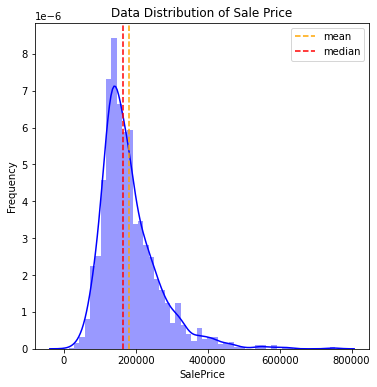

In [48]:
#checking Data Distribution of SalePrice
plt.figure(figsize=(6,6))

sns.distplot(ames_train['SalePrice'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Sale Price')

plt.axvline(ames_train['SalePrice'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

In [49]:
# Sale price is right skewed with long right tailed
ames_train['SalePrice'].skew().round(2)

1.79

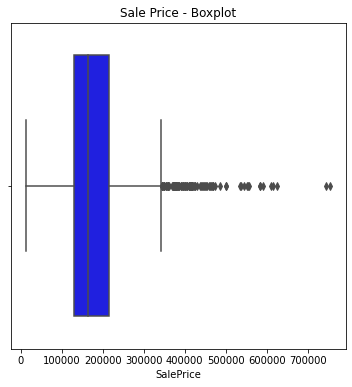

In [50]:
#checking outliers
plt.figure(figsize=(6,6))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice'], color='b');


In [51]:
# Log transform Sale price to treat outliers and convert right skewed data ton normal distribution form
ames_train['SalePrice_log'] = np.log(ames_train['SalePrice'])

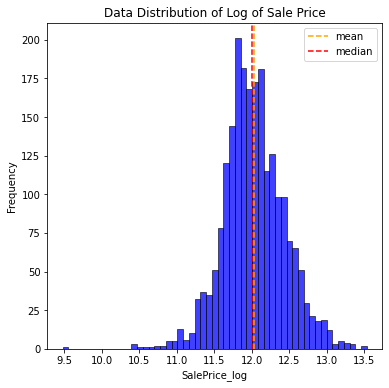

In [52]:
#checking Data Distribution of Log(SalePrice)
plt.figure(figsize=(6,6))

sns.histplot(ames_train['SalePrice_log'], color='b')

plt.ylabel('Frequency')

plt.title('Data Distribution of Log of Sale Price')

plt.axvline(ames_train['SalePrice_log'].mean(), linestyle = '--', color = 'orange', label ='mean')

plt.axvline(ames_train['SalePrice_log'].median(), linestyle = '--', color = 'r', label ='median')

plt.legend();

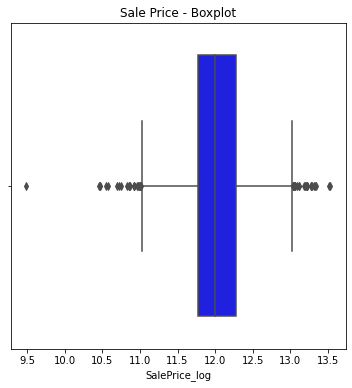

In [53]:
#checking outliers of Log of Sale Price
plt.figure(figsize=(6,6))
plt.title('Sale Price - Boxplot')
sns.boxplot(x=ames_train['SalePrice_log'], color='b');

In [54]:
#Dropping the outliers. 
ames_train = ames_train[(ames_train['SalePrice_log'] > 10 )]
ames_train = ames_train[(ames_train['SalePrice_log'] < 13.5 )]
ames_train.shape

(2189, 77)

In [55]:
ames_train['SalePrice_log'].skew().round(2)

0.07

Exploring potential independent variables with predictive power of sale price

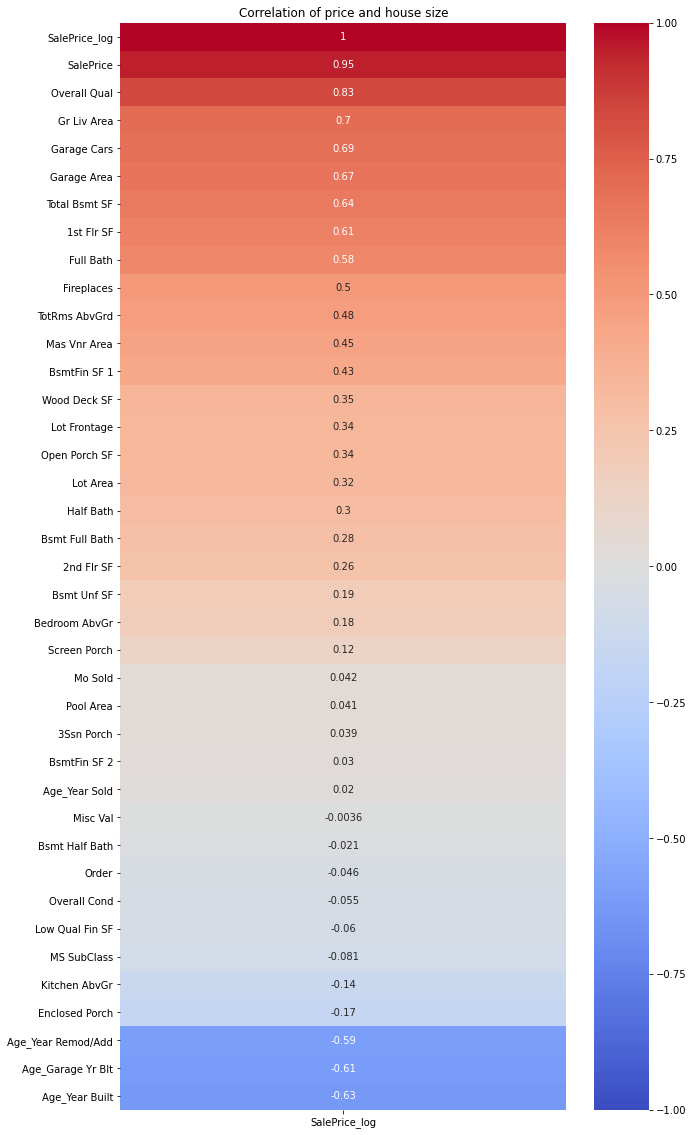

In [56]:
plt.figure(figsize = (10,20))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of price and house size')

plt.yticks(rotation =0)
plt.show()

In [57]:
#14 variables which have correlation coefficient 0.4 and above will be explore collinearity later, orther varibables are dropped \
ames_train.drop( ['MS SubClass', 'Lot Frontage', 'Lot Area', 
             'Overall Cond', 'BsmtFin SF 2', 
             'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF', 
             'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 
             'Bedroom AbvGr', 'Kitchen AbvGr',
             'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
             'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 
             'Age_Year Sold'], axis=1, inplace=True)

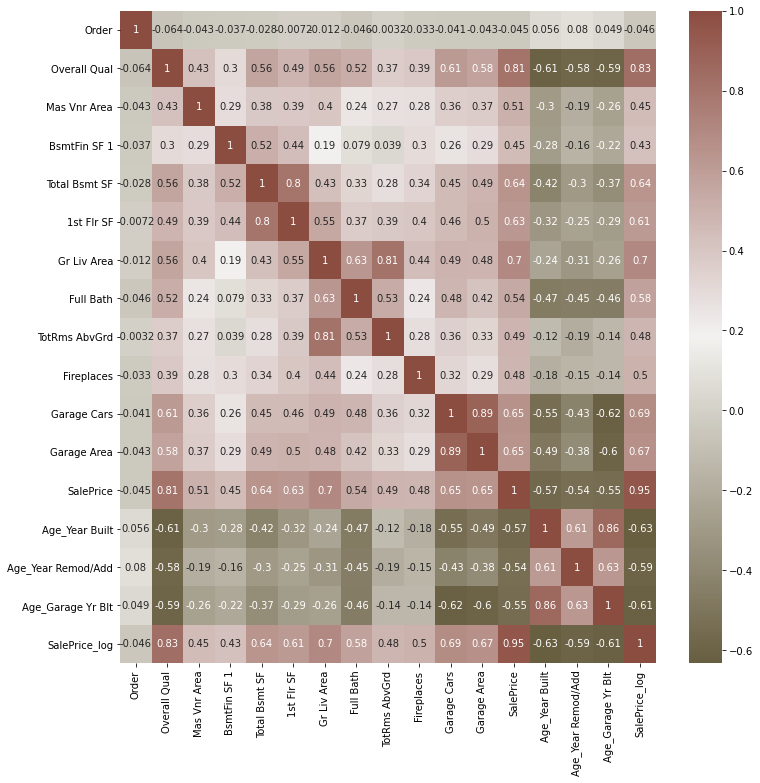

In [58]:
#Checking collinearity using correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= ames_train.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, );

Variables which could potetially cause colinearity issues leading overfitting model are
* '1st Flr SF'  : 'Total Bsmt SF'  ==> dropping '1st Flr SF' 
* 'Gr Liv Area' : 'TotRms AbvGrd' ==> dropping 'TotRms AbvGrd'
* 'Garage Cars' : 'Garage Area' ==> dropping 'Garage Area' 
* 'Age_Year Built' : 'Age_Garage Yr Blt' ==> dropping 'Age_Garage Yr Blt'


In [59]:
# Drop variables which could potetially cause collinearity issues leading overfitting model 
ames_train.drop( ['1st Flr SF', 'TotRms AbvGrd', 'Garage Area' , 'Age_Garage Yr Blt' ], axis=1, inplace=True)

In [60]:
# Get list of float and integer variables
nvar = (ames_train.dtypes !="object")
numer_cols = list(nvar[nvar].index)
print("numerical variables:")
print(numer_cols)

numerical variables:
['Order', 'Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Cars', 'SalePrice', 'Age_Year Built', 'Age_Year Remod/Add', 'SalePrice_log']


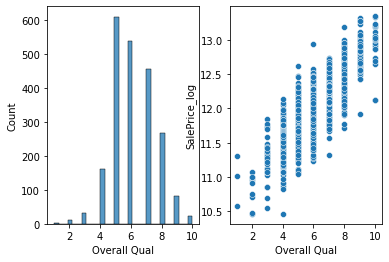

In [61]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Overall Qual'], ax=axes[0])
sns.scatterplot(x = ames_train['Overall Qual'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

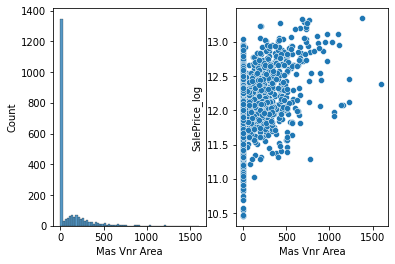

In [62]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Mas Vnr Area'], ax=axes[0])
sns.scatterplot(x = ames_train['Mas Vnr Area'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

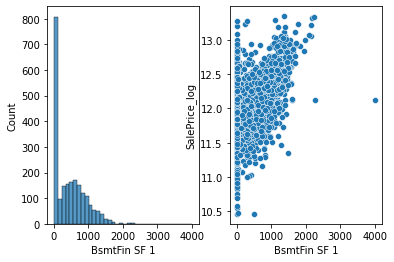

In [63]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['BsmtFin SF 1'], ax=axes[0])
sns.scatterplot(x = ames_train['BsmtFin SF 1'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

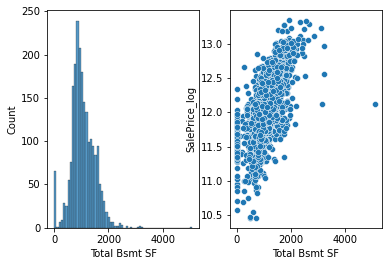

In [64]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Total Bsmt SF'], ax=axes[0])
sns.scatterplot(x = ames_train['Total Bsmt SF'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

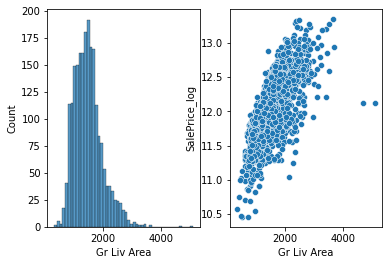

In [65]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Gr Liv Area'], ax=axes[0])
sns.scatterplot(x = ames_train['Gr Liv Area'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

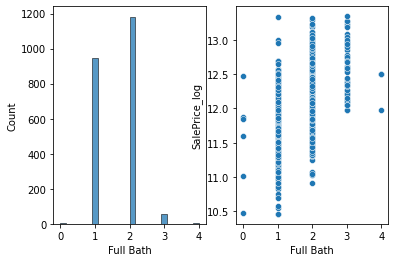

In [66]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Full Bath'], ax=axes[0])
sns.scatterplot(x = ames_train['Full Bath'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

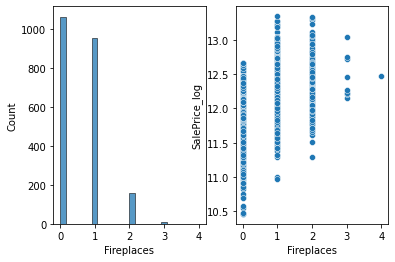

In [67]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Fireplaces'], ax=axes[0])
sns.scatterplot(x = ames_train['Fireplaces'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

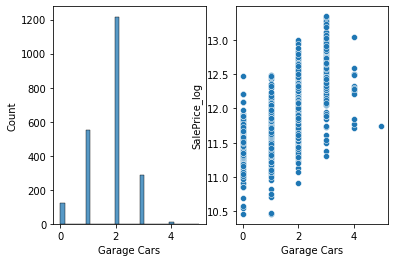

In [68]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Garage Cars'], ax=axes[0])
sns.scatterplot(x = ames_train['Garage Cars'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

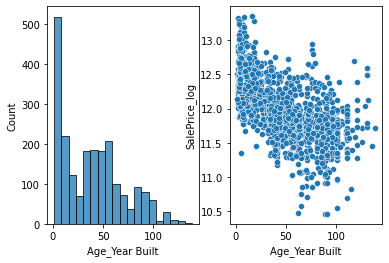

In [69]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Age_Year Built'], ax=axes[0])
sns.scatterplot(x = ames_train['Age_Year Built'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

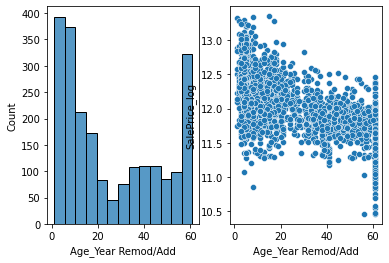

In [70]:
fig,axes=plt.subplots(1,2)
sns.histplot(ames_train['Age_Year Remod/Add'], ax=axes[0])
sns.scatterplot(x = ames_train['Age_Year Remod/Add'], y= ames_train['SalePrice_log'],ax=axes[1])
plt.show()

#### Exploring categorical variables

In [71]:
# Creating a function to plot boxplot

def subplot_boxplot(dataframe, list_of_columns):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) 
    
    ax = ax.ravel() 
    
    if len(list_of_columns) %2 !=0:
        
        ax[len(list_of_columns)].set_visible(False)
        
    for i, column in enumerate(list_of_columns):
        
        names = ames_train.groupby(column).mean()['SalePrice_log'].sort_values().index
        
        sns.boxplot(dataframe[column],dataframe['SalePrice_log'],order = names, ax = ax[i], color="#99d6ff") 
        
        ax[i].set_title(f' " Log SalePrice" vs "{column}"', fontsize =18)
        
        ax[i].set_ylabel('Values',fontsize=15)
        
        ax[i].set_xlabel(column,fontsize=15) 
        
        ax[i].set_xticklabels(names,rotation=40) 
        
    plt.tight_layout()

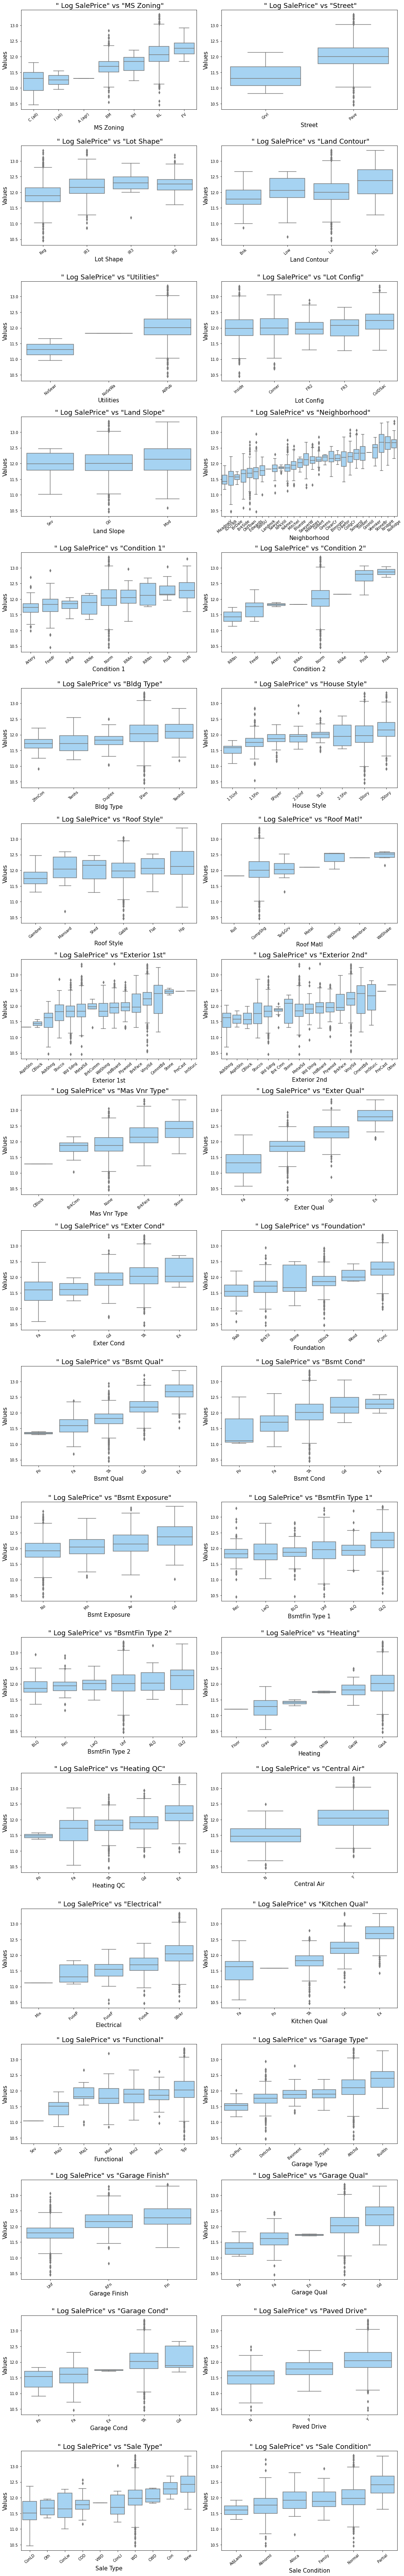

In [72]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
subplot_boxplot(ames_train, Catogories_columns)

Variables which could not be good predictor for Sale Price
* Lot Config
* Land Slope 
* Roof Style  
* BsmtFin Type 1 
* BsmtFin Type 2

Variables which could be good predictor for Sale Price

* MS Zoning
* Street
* Utilities
* Exter Qual
* Neighborhood
* Mas Vnr Type
* Bsmt Cond
* Heating QC
* Central Air
* Kitchen Qual
* Garage Finish
* Pave Drive
* Sale Condition


In [73]:
ames_train['Street'].value_counts()

Pave    2180
Grvl       9
Name: Street, dtype: int64

In [74]:
ames_train['Condition 1'].value_counts()

Norm      1887
Feedr      121
Artery      66
RRAn        39
PosN        32
RRAe        18
PosA        14
RRNn         6
RRNe         6
Name: Condition 1, dtype: int64

In [75]:
ames_train['Condition 2'].value_counts()

Norm      2167
Feedr       10
PosN         4
Artery       2
PosA         2
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64

In [76]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [77]:
# Drop variables which could could not be good predictor for Sale Price
ames_train.drop( ['Lot Config', 'Land Slope', 'Roof Style' , 'BsmtFin Type 1', 'BsmtFin Type 2'  ], axis=1, inplace=True)

In [78]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition'],
      dtype='object')

Checking collinearity of catergorical variables

In [79]:
ames_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2189.0,1459.460027,847.572570,1.000000,730.00000,1447.000000,2198.000000,2929.000000
Overall Qual,2189.0,6.111923,1.419951,1.000000,5.00000,6.000000,7.000000,10.000000
Mas Vnr Area,2189.0,103.155322,182.290133,0.000000,0.00000,0.000000,164.000000,1600.000000
BsmtFin SF 1,2189.0,441.020101,450.585642,0.000000,0.00000,364.000000,737.000000,4010.000000
Total Bsmt SF,2189.0,1057.322522,441.454099,0.000000,792.00000,996.000000,1334.000000,5095.000000
Gr Liv Area,2189.0,1502.998173,496.833171,334.000000,1141.00000,1452.000000,1759.000000,5095.000000
Full Bath,2189.0,1.590681,0.552231,0.000000,1.00000,2.000000,2.000000,4.000000
Fireplaces,2189.0,0.594792,0.643339,0.000000,0.00000,1.000000,1.000000,4.000000
Garage Cars,2189.0,1.780265,0.762857,0.000000,1.00000,2.000000,2.000000,5.000000
SalePrice,2189.0,181721.124714,79203.423612,34900.000000,130000.00000,163500.000000,215000.000000,625000.000000


 <a id="2"></a>
<h1 style='background:#a9a799; border:0; color:black'><center>MODEL BUILDING</center></h1> 

Based Model

In [80]:
# Assemble our X and y variables

X = ames_train[['Overall Qual']]
y = ames_train['SalePrice_log']

# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

# Model

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')
print()

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print()

y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )
print()

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.6976729756245561

Test R-squared Score: 0.6723194996439456

R^2 is : 0.6976729756245561
MSE is : 0.051755954943474555
RMSE is : 0.22749935152319567

MSE is : 1997983843.995335
RMSE is : 44698.81255688271


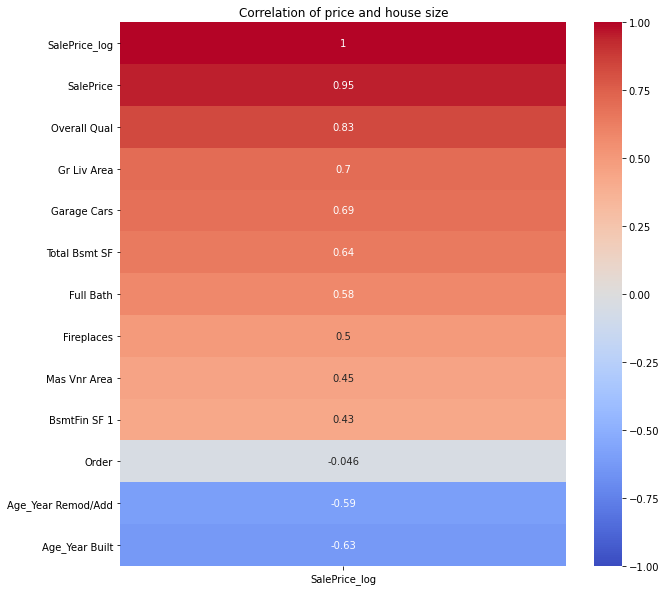

In [81]:
plt.figure(figsize = (10,10))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of price and house size')

plt.yticks(rotation =0)
plt.show()

In [82]:
#Assemble our X and y variables

X = ames_train[['Overall Qual','Gr Liv Area']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.7662222360066124
Test R-squared Score: 0.7794329819658788
R^2 is : 0.7662222360066124
MSE is : 0.0348377661624246
RMSE is : 0.186648777554059
MSE is : 1185965816.5407598
RMSE is : 34437.85441256118


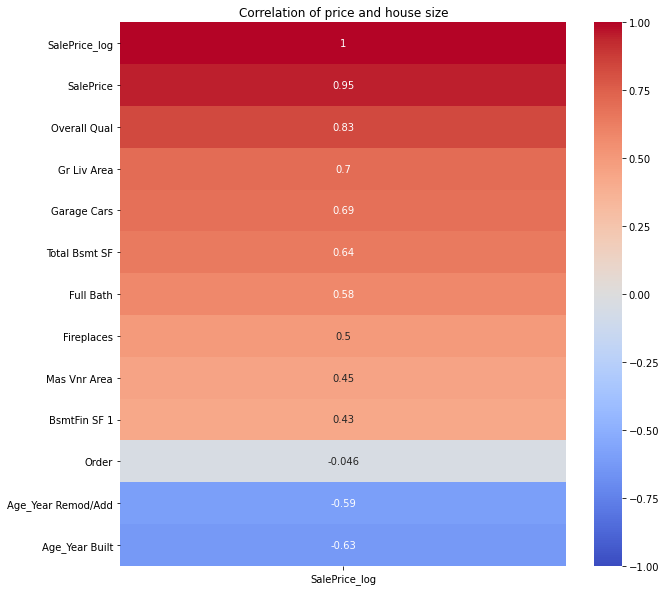

In [83]:
plt.figure(figsize = (10,10))
sns.heatmap(ames_train.corr()[['SalePrice_log']].sort_values(by = 'SalePrice_log', ascending = False), 
                cmap = 'coolwarm',
                vmax = 1,
                vmin = -1,
                annot = True)
plt.title('Correlation of price and house size')

plt.yticks(rotation =0)
plt.show()

In [84]:
#Assemble our X and y variables
X = ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')


# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.7999962323877949
Test R-squared Score: 0.7843669746241735
R^2 is : 0.7999962323877949
MSE is : 0.034058459791015086
RMSE is : 0.1845493424291051
MSE is : 1142557293.4383228
RMSE is : 33801.735065501045


In [85]:
#Assemble our X and y variables
X = ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars','Total Bsmt SF']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8180315283573522
Test R-squared Score: 0.81269598328152
R^2 is : 0.8180315283573522
MSE is : 0.029583994895881635
RMSE is : 0.17199998516244597
MSE is : 969295024.2670834
RMSE is : 31133.50324436817


In [86]:
#Assemble our X and y variables
X = ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars','Total Bsmt SF', 'Age_Year Built']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 


#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8370325964272715
Test R-squared Score: 0.8360283023677029
R^2 is : 0.8370325964272715
MSE is : 0.025898739123752686
RMSE is : 0.1609308519947393
MSE is : 917197725.7297428
RMSE is : 30285.272422907852


In [87]:
#Assemble our X and y variables
X = ames_train[['Overall Qual','Gr Liv Area', 'Garage Cars','Total Bsmt SF', 'Age_Year Built', 'Age_Year Remod/Add']]
y = ames_train['SalePrice_log']


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)


#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8420843002802815
Test R-squared Score: 0.8484825630518364
R^2 is : 0.8420843002802815
MSE is : 0.02393163350067806
RMSE is : 0.15469852455882718
MSE is : 872863760.2814488
RMSE is : 29544.26780750284


All numerical variables

In [88]:
Catogories_columns = ames_train.select_dtypes(include = 'int64').columns
Catogories_columns

Index(['Order', 'Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
       'SalePrice', 'Age_Year Built', 'Age_Year Remod/Add'],
      dtype='object')

In [89]:
Catogories_columns = ames_train.select_dtypes(include = 'float64').columns
Catogories_columns

Index(['Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
       'SalePrice_log'],
      dtype='object')

In [90]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars']]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8600249871930721
Test R-squared Score: 0.8714181989104202
R^2 is : 0.8600249871930721
MSE is : 0.02030903241575858
RMSE is : 0.14250976252790046
MSE is : 715400074.6857547
RMSE is : 26746.963840513836


In [91]:
#'Full Bath' is not helping
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars', 'Full Bath']]
y = ames_train['SalePrice_log']


# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)


#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8600249871930721
Test R-squared Score: 0.8714181989104204
R^2 is : 0.8600249871930721
MSE is : 0.020309032415758554
RMSE is : 0.14250976252790037
MSE is : 715400074.6857525
RMSE is : 26746.963840513796


In [92]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning']]
X = pd.get_dummies(columns=['MS Zoning'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')


# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8705319539929258
Test R-squared Score: 0.8806565862000248
R^2 is : 0.8705319539929258
MSE is : 0.018849862413907365
RMSE is : 0.1372948011175491
MSE is : 668523483.8158904
RMSE is : 25855.821081835526


In [93]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')


# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(cross_val_score(model, X_train, y_train, cv =5))
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.871293603112256
Test R-squared Score: 0.8821444717616203
[0.89911174 0.87070055 0.89035834 0.73565857 0.89465807]
R^2 is : 0.871293603112256
MSE is : 0.018614856247830047
RMSE is : 0.1364362717455664
MSE is : 647754320.4417437
RMSE is : 25451.01806297233


In [94]:
test_order = ames_test.Order
test=ames_test[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual']]
test = pd.get_dummies(columns=['MS Zoning', 'Exter Qual'], drop_first =True, data =test)
test.columns

## dummied category only in train data
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0
    
## dummied category only in test data
for col in set(test.columns) - set(X_train.columns):
    test.drop(col, axis=1, inplace=True)

In [95]:
X

,Overall Qual,Gr Liv Area,Full Bath,Fireplaces,Age_Year Built,Age_Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,Garage Cars,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA
0,7,1218,1,0,4,4,0.0,0.0,1218.0,2.0,0,0,0,0,1,0,0,1,0
1,7,2196,2,1,21,20,234.0,485.0,2158.0,3.0,0,0,0,0,1,0,0,1,0
2,6,1344,1,1,53,53,541.0,111.0,819.0,2.0,0,0,0,0,1,0,0,0,1
3,9,1456,2,1,3,3,500.0,0.0,1451.0,2.0,0,0,0,0,1,0,0,0,0
4,7,1374,2,0,7,7,0.0,241.0,384.0,2.0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,8,1915,2,1,19,19,0.0,789.0,908.0,2.0,0,0,0,0,1,0,0,1,0
2193,5,1268,1,2,73,61,88.0,832.0,832.0,1.0,0,0,0,1,0,0,0,0,1
2194,7,2322,2,1,12,11,0.0,870.0,1037.0,2.0,0,0,0,0,1,0,0,1,0
2195,5,835,1,0,91,61,0.0,108.0,458.0,1.0,0,0,0,0,1,0,0,0,1


In [96]:
preds_test = model.predict(test)
preds_test = np.e**(preds_test)
preds_test[:10]

array([ 95299.7781353 , 168207.05431862, 162033.90160067, 174234.26736262,
       148925.65406685, 106268.93951021, 187854.58929035, 141036.6673335 ,
       114377.77382964, 109084.87229271])

In [97]:
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,95299.778135
1,193,168207.054319
2,2407,162033.901601
3,46,174234.267363
4,2478,148925.654067
...,...,...
728,453,156538.290271
729,1352,146293.033114
730,197,124890.051912
731,2850,148560.428344


In [98]:
pred_df.to_csv('submission2.csv', index=False)

In [99]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual'], drop_first =True, data =X)
y = ames_train['SalePrice_log']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8735333841011637
Test R-squared Score: 0.8836524393830228
R^2 is : 0.8735333841011637
MSE is : 0.018376678192728427
RMSE is : 0.1355606070830624
MSE is : 638409014.9277331
RMSE is : 25266.757111424748


In [100]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive'], drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(cross_val_score(model, X_train, y_train, cv =5))
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8756776703282917
Test R-squared Score: 0.8861882419177146
[0.90142045 0.8738554  0.89204968 0.74003219 0.89689629]
R^2 is : 0.8756776703282917
MSE is : 0.017976157314652217
RMSE is : 0.1340751927638078
MSE is : 634673958.2387234
RMSE is : 25192.736219766273


In [101]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood'], drop_first =True, data =X)
y = ames_train['SalePrice_log']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

y_preds = model.predict(X_test)
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8900646724371312
Test R-squared Score: 0.8868359533388243
R^2 is : 0.8900646724371312
MSE is : 0.017873853628314774
RMSE is : 0.13369313231544383
MSE is : 624205074.7251822
RMSE is : 24984.096436036707


In [102]:
#'Bsmt Cond' is hurting
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood','Bsmt Cond' ]]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Bsmt Cond'], drop_first =True, data =X)
y = ames_train['SalePrice_log']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8913302170650201
Test R-squared Score: 0.8856566590397749
R^2 is : 0.8913302170650201
MSE is : 0.018060118915813963
RMSE is : 0.1343879418542228
MSE is : 636834041.6946123
RMSE is : 25235.57096034509


In [103]:
#'Bsmt Cond' is hurting
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood','Central Air' ]]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Central Air'], drop_first =True, data =X)
y = ames_train['SalePrice_log']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8945278160002941
Test R-squared Score: 0.8863712708656639
R^2 is : 0.8945278160002941
MSE is : 0.01794724855147248
RMSE is : 0.13396734136151423
MSE is : 619104666.3675853
RMSE is : 24881.813968591305


In [104]:
#'Bsmt Cond' is hurting
#'Heating QC' is hurting
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood','Central Air', 'Heating QC']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Central Air', 'Heating QC'],
                   drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

y_preds = model.predict(X_test)
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8958930057802943
Test R-squared Score: 0.8859149146843832
R^2 is : 0.8958930057802943
MSE is : 0.01801932836681357
RMSE is : 0.1342360918934009
MSE is : 622305594.3436444
RMSE is : 24946.053682770034


In [105]:
#'Bsmt Cond' is hurting
#'Heating QC' is hurting
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood','Central Air', 'Electrical']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Central Air','Electrical'],
                   drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
print(cross_val_score(model, X_train, y_train, cv =5))

y_preds = model.predict(X_test)
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8953282849128918
Test R-squared Score: 0.8865325507446838
[0.90518976 0.88601998 0.90929124 0.76924565 0.90456309]
R^2 is : 0.8953282849128918
MSE is : 0.017921774975404394
RMSE is : 0.13387223377311813
MSE is : 618338865.8100375
RMSE is : 24866.420446257187


In [106]:
test_order = ames_test.Order
test=ames_test[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 'Neighborhood','Central Air', 'Electrical']]
test = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Central Air','Electrical'],
                   drop_first =True, data =test)
test.columns

## dummied category only in train data
for col in set(X_train.columns) - set(test.columns):
    test[col] = 0
    
## dummied category only in test data
for col in set(test.columns) - set(X_train.columns):
    test.drop(col, axis=1, inplace=True)

In [107]:
test.shape

(733, 57)

In [108]:
X.shape

(2189, 57)

In [109]:
preds_test = model.predict(test)
preds_test = np.e**(preds_test)
preds_test[:10]

array([ 87155.64019991, 143519.422846  , 174111.67980664, 185468.72583895,
       166742.99915483, 180918.64509219, 197152.63078765, 150685.47020539,
        95166.38598808, 131177.23230859])

In [110]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':test_order, 'SalePrice':preds_test})
pred_df

,Order,SalePrice
0,2127,87155.640200
1,193,143519.422846
2,2407,174111.679807
3,46,185468.725839
4,2478,166742.999155
...,...,...
728,453,170246.862334
729,1352,170199.163013
730,197,126751.000360
731,2850,160598.810175


In [111]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission1.csv', index=False)

In [112]:
#'Bsmt Cond' is hurting
#'Heating QC' is hurting
#Street is hurting
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                      'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars',
                    'MS Zoning', 'Exter Qual', 'Kitchen Qual', 'Paved Drive', 
                      'Neighborhood','Central Air', 'Electrical','Street']]
X = pd.get_dummies(columns=['MS Zoning', 'Exter Qual','Kitchen Qual', 'Paved Drive', 'Neighborhood', 'Central Air','Electrical','Street'],
                   drop_first =True, data =X)
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

Train R-squared Score: 0.8953776736266424
Test R-squared Score: 0.8864761096830728
R^2 is : 0.8953776736266424
MSE is : 0.01793068963782261
RMSE is : 0.13390552504591666
MSE is : 39903537191.40327
RMSE is : 24868.441322774383


In [113]:
# from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import ElasticNetCV

In [114]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

0.7890983743656674
0.8159000486071096


In [115]:
# Here is the optimal value of alpha.
enet_model.alpha_

0.5

<AxesSubplot:>

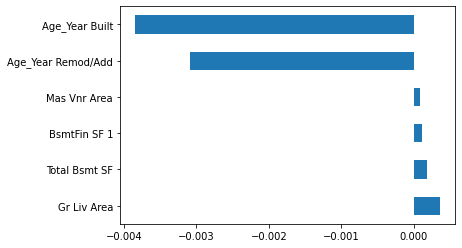

In [116]:
enet_coefs = enet_model.coef_
enet_coefs = pd.Series(enet_coefs, X.columns)
enet_coefs[enet_coefs !=0].sort_values(ascending = False)
enet_coefs[enet_coefs !=0].sort_values(ascending = False).plot.barh()

Dropp variable suggest enet

In [117]:
#Assemble our X and y variables
X = ames_train[['Overall Qual','Age_Year Built', 'Age_Year Remod/Add' ]]
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

Train R-squared Score: 0.7297177809342597


In [118]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: 0.7005512910954176


In [119]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([0.73777464, 0.7095615 , 0.7312608 , 0.69530762, 0.76152583])

In [120]:
y_preds = model.predict(X_test)

In [121]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.7297177809342597
MSE is : 0.04729684515589711
RMSE is : 0.2174783785940504


In [122]:
y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

In [123]:
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

MSE is : 39903551729.15603
RMSE is : 44397.51772969072


Only categorical variables

In [124]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [132]:
#Assemble our X and y variables
X = ames_train[['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition']]
X = pd.get_dummies(columns=['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition'], drop_first =True, data =X )
y = ames_train['SalePrice_log']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)
y_preds = model.predict(X_test)

#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )


Train R-squared Score: 0.8539011695860834
Test R-squared Score: -6.161971259053742e+19
R^2 is : 0.8539011695860834
MSE is : 9.732611690351933e+18
RMSE is : 3119713398.7518682
MSE is : 9.732581077767225e+18


ValueError: Input contains infinity or a value too large for dtype('float64').

In [126]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

Test R-squared Score: -6.161971259053742e+19


In [127]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

array([-1.32923175e+21, -8.31255047e+22, -3.30156648e+20, -2.05892562e+23,
       -3.30634636e+23])

In [128]:
y_preds = model.predict(X_test)

In [129]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

R^2 is : 0.8539011695860834
MSE is : 9.732611690351933e+18
RMSE is : 3119713398.7518682


In [130]:
y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

In [131]:
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}')

MSE is : 9.732581077767225e+18


ValueError: Input contains infinity or a value too large for dtype('float64').

Model with essential categorical variables

In [ ]:
Catogories_columns = ames_train.select_dtypes(include = 'object').columns
Catogories_columns

In [ ]:
#Assemble our X and y variables
X = ames_train[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
                     'Age_Year Built', 'Age_Year Remod/Add',
                   'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
                     'MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
                   'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
                   'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
                   'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
               'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
               'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
               'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
               'Sale Type', 'Sale Condition']]
X = pd.get_dummies(columns=['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition'], drop_first =True, data =X )
y = ames_train['SalePrice_log']
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42) 

#Instantiate the model/Fit Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Train Score
model.score(X_train, y_train)
print(f'Train R-squared Score: {model.score(X_train, y_train)}')

In [ ]:
# Test Score
model.score(X_test, y_test)
print(f'Test R-squared Score: {model.score(X_test, y_test)}')

In [ ]:
# Cross Val Score
cross_val_score(model, X_train, y_train, cv =5)

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
#evaluate models with matrics
print(f'R^2 is : {model.score(X_train,y_train)}' )
print(f'MSE is : {mean_squared_error(y_test, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test, y_preds, squared = False)}' )

In [ ]:
y_preds_original_scale = np.e**(y_preds)
y_train_original_scale = np.e**(y_train)
y_test_original_scale = np.e**(y_test)

In [ ]:
#evaluate models with matrics
print(f'MSE is : {mean_squared_error(y_test_original_scale, y_preds)}' )
print(f'RMSE is : {mean_squared_error(y_test_original_scale, y_preds_original_scale, squared = False)}' )

In [ ]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.1, 1.0, 100)

# Set up our l1 ratio. (What does this do?)
enet_ratio = 0.5

# Instantiate model.
enet_model = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model = enet_model.fit(X_train, y_train)

# Generate predictions.
enet_model_preds = enet_model.predict(X_test)
enet_model_preds_train = enet_model.predict(X_train)

# Evaluate model.
print(enet_model.score(X_train, y_train))
print(enet_model.score(X_test, y_test))

In [ ]:
# Here is the optimal value of alpha.
enet_model.alpha_

In [ ]:
enet_coefs = enet_model.coef_
enet_coefs = pd.Series(enet_coefs, X.columns)
enet_coefs[enet_coefs !=0].sort_values(ascending = False)
enet_coefs[enet_coefs !=0].sort_values(ascending = False).plot.barh();

In [ ]:
X.columns

In [ ]:
ames_test.columns

In [ ]:
#ames_test_order = ames_test.Order
ames_test = ames_test[['Overall Qual', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
       'Age_Year Built', 'Age_Year Remod/Add','Mas Vnr Area', 'BsmtFin SF 1', 
        'Total Bsmt SF', 'Garage Area', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition']]
ames_test = pd.get_dummies(columns=['MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
        'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive',
       'Sale Type', 'Sale Condition'], drop_first =True, data =ames_test )
ames_test.columns

In [ ]:
ames_test.head()

In [ ]:
ames_test['Full Bath'].unique()

In [ ]:
ames_test = pd.get_dummies(ames_test ['Full Bath'])

In [ ]:
ames_test.columns = [str(_) for _ in ames_test.columns]

In [ ]:
ames_test.columns.unique()

In [ ]:
preds_test = model.predict(ames_test)
preds_test = np.e**(preds_test)
preds_test[:10]

In [ ]:
## create dataframe with "Order" and prediction
pred_df = pd.DataFrame({'Order':ames_test_order, 'SalePrice':preds_test})
pred_df

In [ ]:
## save to csv file for submission
## index = False
pred_df.to_csv('submission1.csv', index=False)

In [ ]:
preds_test = model.predict(ames_test)
preds_test = np.e**(preds_test)
preds_test[:10]